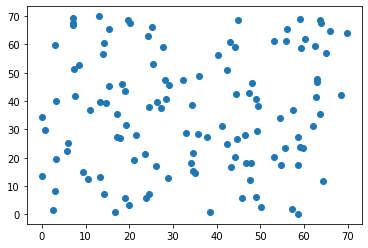

In [51]:
import random
import matplotlib.pyplot as plt
import pandas as pd
random.seed(0)


def create_dummy_df(plot=True):
    x = []
    y = []
    for i in range(40):
        x.append(random.uniform(0, 30))
        y.append(random.uniform(0, 70))
        
        x.append(random.uniform(30, 70))
        y.append(random.uniform(0, 70))
        
        x.append(random.uniform(0, 70))
        y.append(random.uniform(0, 70))
    df = pd.DataFrame({'a': x, 'b': y})
#     print("before reset index")
#     print(df)
#     print(df.columns)
    df = df.reset_index()
#     print(df)
#     print(df.columns)
    if plot:
        plt.scatter(df['a'], df['b'])
    return df

df = create_dummy_df()

In [52]:
df.head()

,index,a,b
0,0,25.332656,53.056808
1,1,46.822863,18.124173
2,2,35.789230,28.345390
3,3,23.513958,21.231891
4,4,49.063878,40.836743


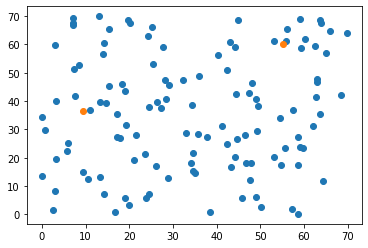

In [53]:
# Step 1: Jumlah cluster
k = 2
# Step 2: Create initial cluster randomly 
#         and bounded to min and max value 
#         so the created cluster in between
def create_initial_random_centroid(df, k, plot=True):
    c_a = []
    c_b = []
    for i in range(k):
        c_a.append(random.uniform(min(df['a']), max(df['a'])))
        c_b.append(random.uniform(min(df['b']), max(df['b'])))
    centr = {
        'a': c_a,
        'b': c_b
    }
    if plot:
        plt.scatter(df['a'], df['b'])
        plt.scatter(centr['a'], centr['b'])
    return centr

centr = create_initial_random_centroid(df, k)

In [57]:
centr

{'a': [55.26584785954536, 9.344114893819212],
 'b': [60.283123425938555, 36.51852429131523]}

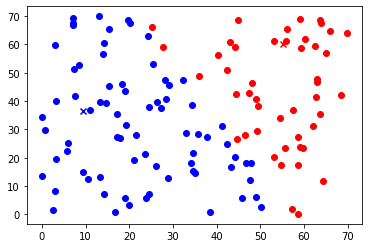

In [62]:
# Step3: Labeli data masuk kluster mana?
import numpy as np

def labelator(x, centr):
    dist = []
    for i in range(len(centr['a'])):
        dist.append(
            np.sqrt((centr['a'][i] - x['a']
                     )**2 + (centr['b'][i] - x['b']
                             )**2))
    
    c = np.argmin(dist)
    if c == 0:
        c = 'red'
    elif c == 1:
        c = 'blue'
    else:
        c = 'green'
    return c



def plt_with_cluster(df, centr):
    plt.scatter(df[df['cluster'] == 'red']['a'], df[df['cluster'] == 'red']['b'], color='r')
    plt.scatter(df[df['cluster'] == 'blue']['a'], df[df['cluster'] == 'blue']['b'], color='b')
#     plt.scatter(df[df['cluster'] == 'green']['a'], df[df['cluster'] == 'green']['b'], color='g')
                    
    plt.scatter([centr['a'][0]], [centr['b'][0]], marker='x', color='r')
    plt.scatter([centr['a'][1]], [centr['b'][1]], marker='x', color='b')
#     plt.scatter([centr['a'][2]], [centr['b'][2]], marker='x', color='g')
    
    plt.show()
    return


def labeli_data(df, centr, plot=True):
    cols = list(df.columns)
    df['cluster'] = df.apply(labelator, args=[centr], axis=1)
    
    if plot:
        plt_with_cluster(df, centr)
    return df

df = labeli_data(df, centr)


In [64]:
# Step 4: Membuat cluster baru yang lebih represntatif
def get_new_centroid(df):
    c_a_ = []
    c_b_ = []
    c = ['red', 'blue']
    for i in range(len(c)):
        df_c = df[df['cluster'] == c[i]]
        c_a_.append(np.mean(df_c['a']))
        c_b_.append(np.mean(df_c['b']))
    return {'a': c_a_, 'b': c_b_}
new_centr = get_new_centroid(df)
new_centr

{'a': [54.15284384534, 21.97422939158715],
 'b': [43.63545962245498, 31.038228087234295]}

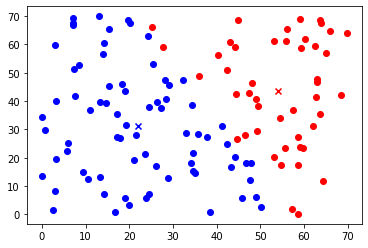

In [65]:
plt_with_cluster(df, new_centr)

Pada iterasi ke: 1 =================


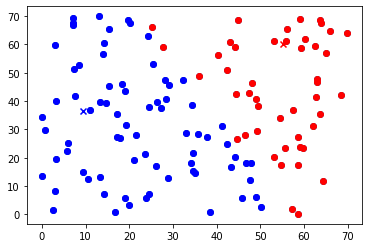

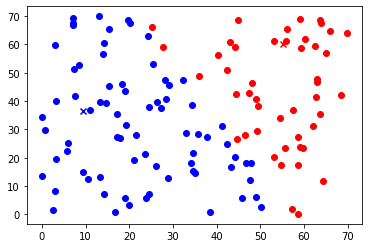

Pada iterasi ke: 2 =================


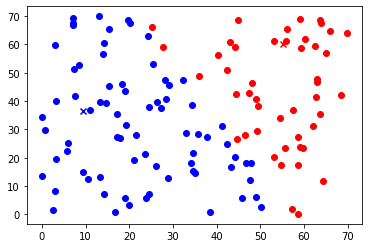

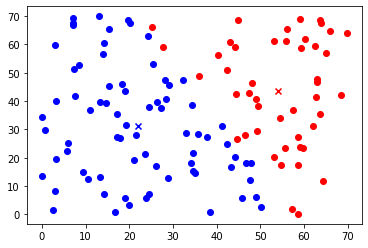

Pada iterasi ke: 3 =================


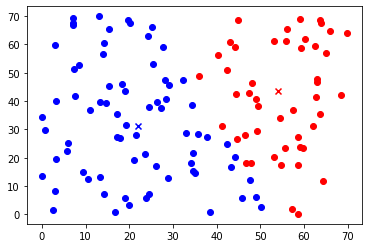

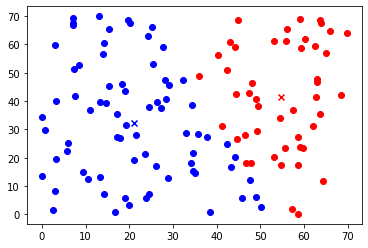

Pada iterasi ke: 4 =================


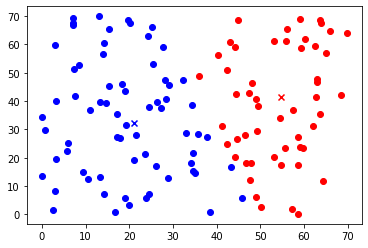

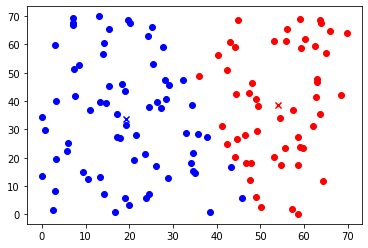

Pada iterasi ke: 5 =================


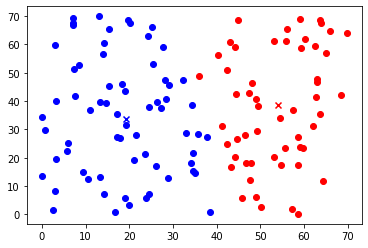

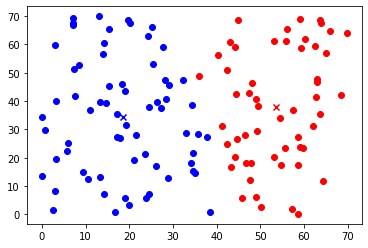

Pada iterasi ke: 6 =================


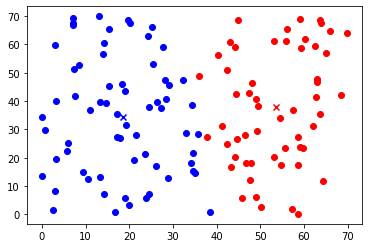

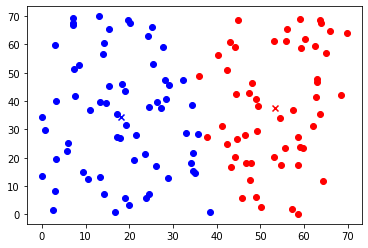

Pada iterasi ke: 7 =================


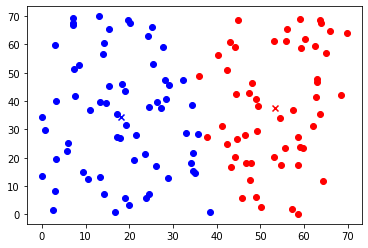

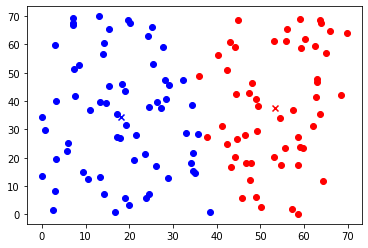

Pada iterasi ke: 8 =================


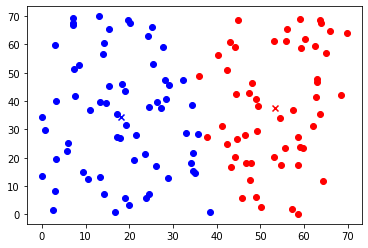

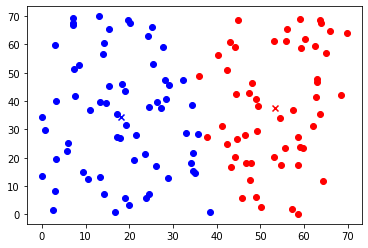

Pada iterasi ke: 9 =================


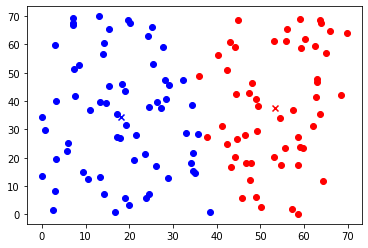

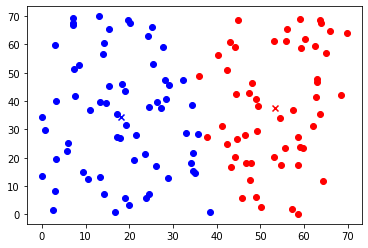

Pada iterasi ke: 10 =================


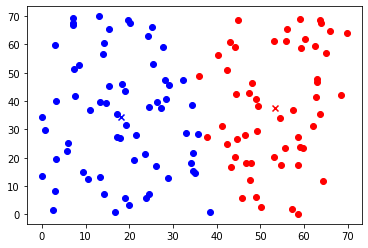

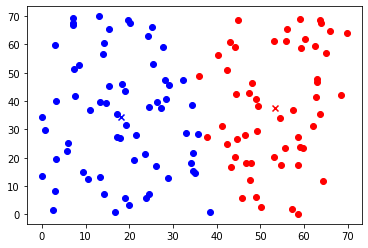

Pada iterasi ke: 11 =================


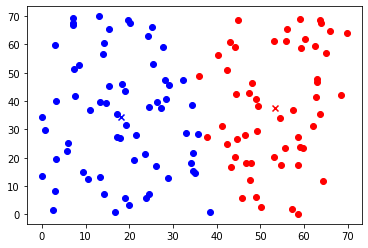

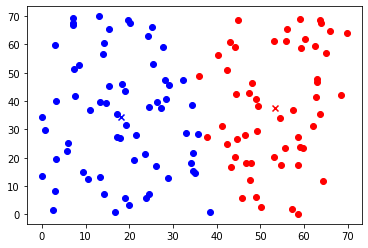

Pada iterasi ke: 12 =================


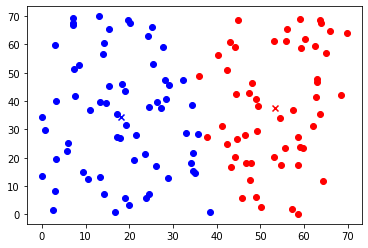

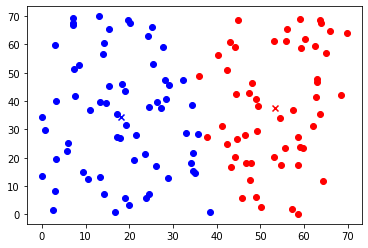

Pada iterasi ke: 13 =================


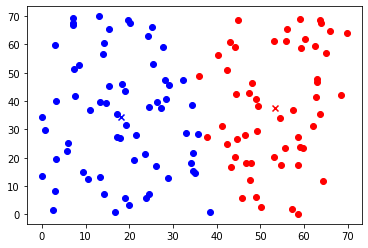

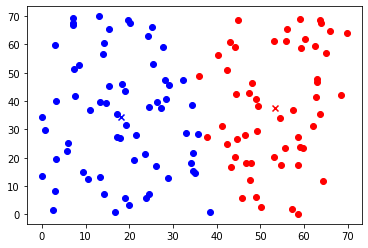

Pada iterasi ke: 14 =================


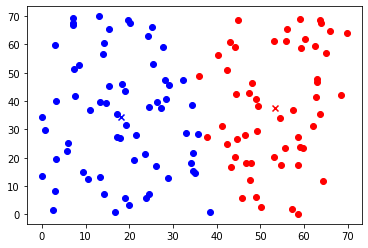

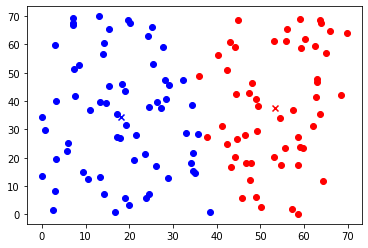

Pada iterasi ke: 15 =================


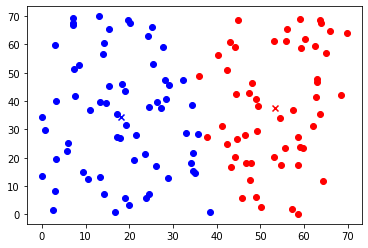

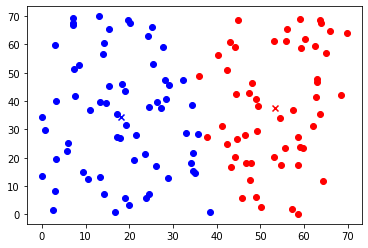

Pada iterasi ke: 16 =================


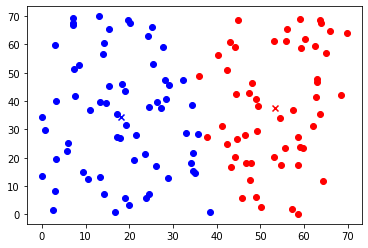

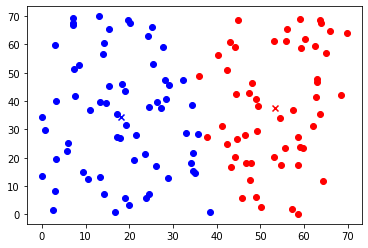

Pada iterasi ke: 17 =================


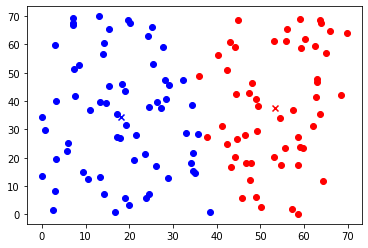

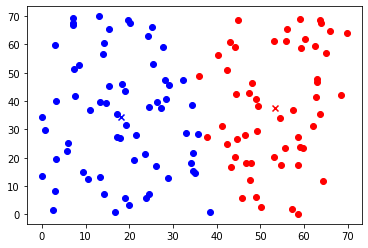

Pada iterasi ke: 18 =================


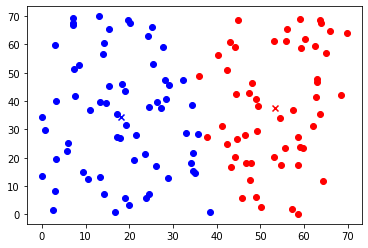

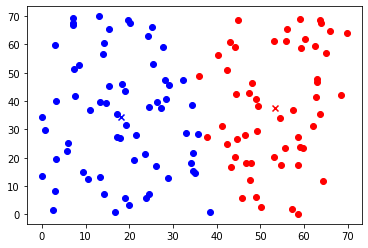

Pada iterasi ke: 19 =================


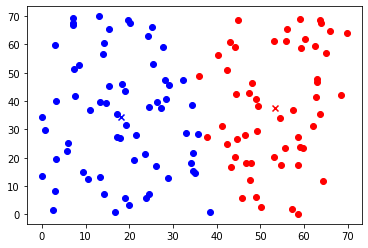

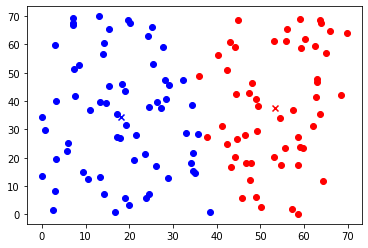

Pada iterasi ke: 20 =================


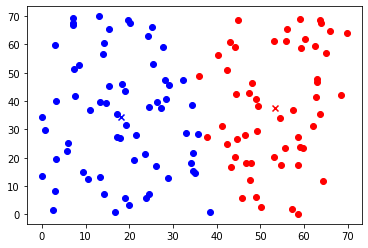

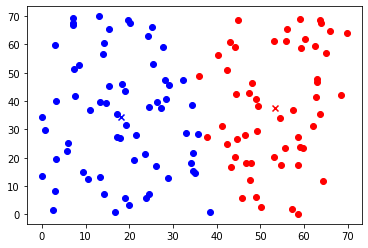

In [68]:
# Step 5: ulangi 3 dan 4
random.seed(0)
df = create_dummy_df()
k = 2

print("Pada iterasi ke:", 1, "=================")
centr_i = create_initial_random_centroid(df, k, plot=False)
df = labeli_data(df, centr_i)
plt_with_cluster(df, centr_i)

iterasi = 1
while iterasi < 20:
    iterasi = iterasi + 1
    print("Pada iterasi ke:", iterasi, "=================")
    centr_i2 = centr_i
    df = labeli_data(df, centr_i)
    
    centr_i = get_new_centroid(df)
    plt_with_cluster(df, centr_i)
    
    
    

In [69]:
# Stop when convergen
def cekker(a, b):
    diff = 1000
    for i in range(len(a)):
        x = abs(a[i] - b[i])
        if x < diff:
            diff = x
    print("diff: ", diff)
    if diff < 0.001:
        return True
    else:
        return False

Pada iterasi ke: 1 =================


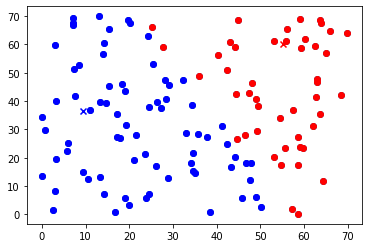

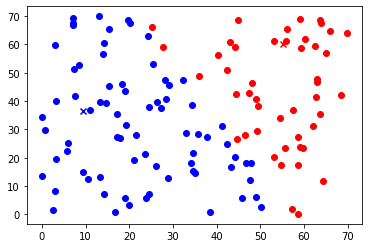

Pada iterasi ke: 2 =================


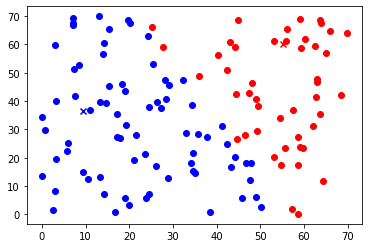

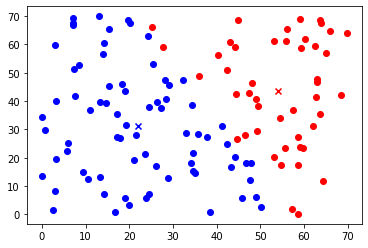

diff:  1.1130040142053588
Pada iterasi ke: 3 =================


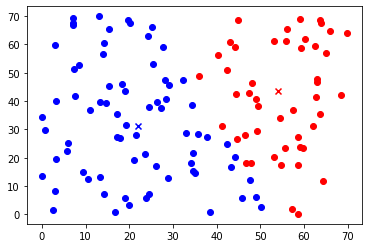

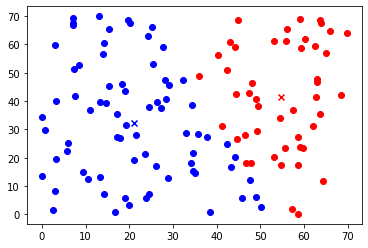

diff:  0.6121656847399422
Pada iterasi ke: 4 =================


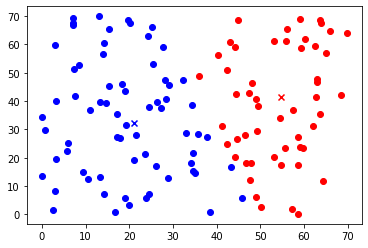

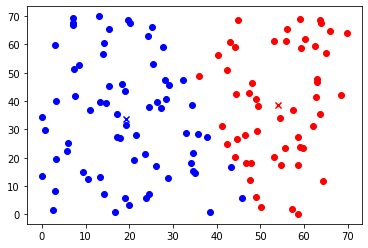

diff:  0.776517767558417
Pada iterasi ke: 5 =================


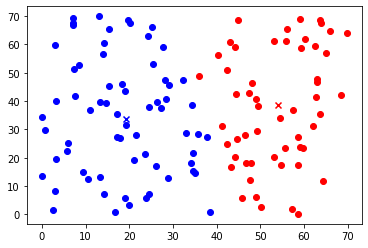

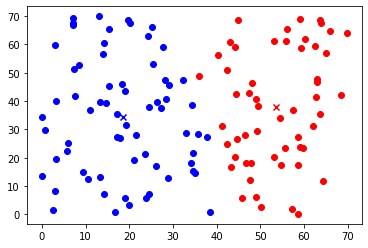

diff:  0.3469086815797411
Pada iterasi ke: 6 =================


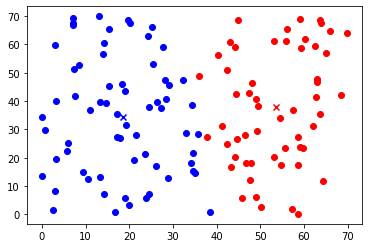

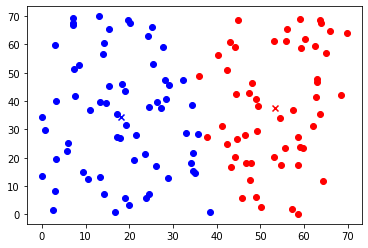

diff:  0.28726524244688534
Pada iterasi ke: 7 =================


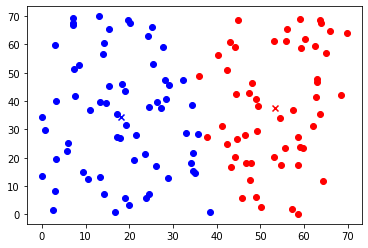

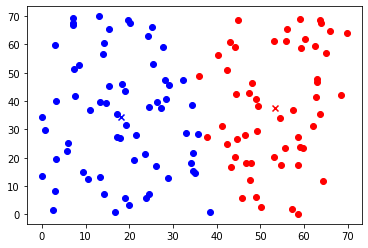

diff:  0.0
YeY, convergen pada iterasi ke:  7


In [46]:
# Step 5: ulangi 3 dan 4 dengan kriteria stop
random.seed(0)
df = create_dummy_df()
k = 2

print("Pada iterasi ke:", 1, "=================")
centr_i = create_initial_random_centroid(df, k, plot=False)
df = labeli_data(df, centr_i)
plt_with_cluster(df, centr_i)

iterasi = 1
convergence = False
while not convergence:
    iterasi = iterasi + 1
    print("Pada iterasi ke:", iterasi, "=================")
    centr_i2 = centr_i
    df = labeli_data(df, centr_i)
    
    centr_i = get_new_centroid(df)
    plt_with_cluster(df, centr_i)
    
    if cekker(centr_i['a'], centr_i2['a']) or (iterasi == 20):
        print("YeY, convergen pada iterasi ke: ", iterasi)
        break


In [70]:
# AI model kameans: centr_i (last)
centr_i

{'a': [53.3543178384949, 18.194404780705685],
 'b': [37.557681416979406, 34.436731433144594]}

In [71]:
df.head()

,index,a,b,cluster
0,0,25.332656,53.056808,blue
1,1,46.822863,18.124173,red
2,2,35.789230,28.345390,blue
3,3,23.513958,21.231891,blue
4,4,49.063878,40.836743,red


,index,a,b
0,0,16.621580,61.016410
1,1,49.841252,5.631531
2,2,3.620672,60.347636
3,3,23.721882,60.091355
4,4,40.489707,45.359815


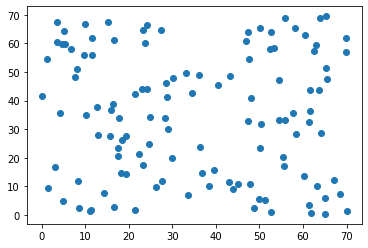

In [76]:
new_df = create_dummy_df()
new_df.head()

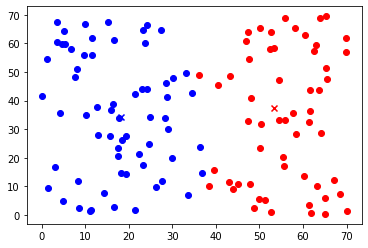

,index,a,b,cluster
0,0,16.621580,61.016410,blue
1,1,49.841252,5.631531,red
2,2,3.620672,60.347636,blue
3,3,23.721882,60.091355,blue
4,4,40.489707,45.359815,red


In [77]:
def predict(df, model):
    df = labeli_data(df, model)
    return df

new_df = predict(new_df, centr_i)
new_df.head()

In [78]:
# Performance dari model yang tadi dibuat
df['cluster_int'] = [0 if x == 'red' else 1 if x == 'blue' else 2 for x in list(df['cluster'])]
df.head()

,index,a,b,cluster,cluster_int
0,0,25.332656,53.056808,blue,1
1,1,46.822863,18.124173,red,0
2,2,35.789230,28.345390,blue,1
3,3,23.513958,21.231891,blue,1
4,4,49.063878,40.836743,red,0


In [82]:
# Silhouette [-1, 1]
# if 1, cluster is dense and well-sparated
# if 0, ada kluster yang overlaping
# if -1 ada data yang salah di labeli

from sklearn.metrics import silhouette_score
score = silhouette_score(df[['a', 'b']], df['cluster_int'], 
                        metric='euclidean')
score

0.35502177058820583

In [83]:
# Memakai packege
from sklearn import datasets
from sklearn.cluster import KMeans

# load data
iris = datasets.load_iris()
x_kita = df[['a', 'b']].to_numpy()

# inisiasi model
km = KMeans(n_clusters=3, random_state=42)

# training
km.fit_predict(x_kita)

# score
score = silhouette_score(x_kita, km.labels_, 
                        metric='euclidean')
print("skor:", score)

skor: 0.39510823218114316


C:\Users\SETYA\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
